<a href="https://colab.research.google.com/github/mahesh2301/MaheshSharma/blob/main/Creditcard_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import numpy as np
import pandas as pd
from pandas import *
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
from collections import Counter
%matplotlib inline
#sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.2)

import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install opendatasets


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
! pip install -q kaggle

In [4]:
! mkdir ~/.kaggle

In [5]:
! cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/jacklizhi/creditcard")

100%|██████████| 66.0M/66.0M [00:03<00:00, 22.5MB/s]


In [8]:
data=pd.read_csv("/content/creditcard/creditcard.csv")

In [9]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [10]:
type(data)

pandas.core.frame.DataFrame

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [12]:
data.shape

(284807, 31)

In [13]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [14]:
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [15]:
numcol=data.select_dtypes(exclude=['object']).columns
catcol=data.select_dtypes(include=['object']).columns

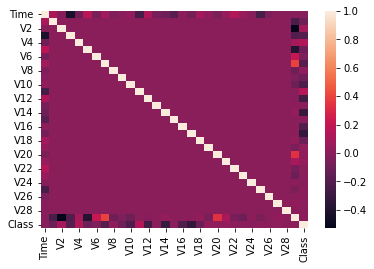

In [16]:
corr=data[numcol].corr()
sb.heatmap(corr)

In [17]:
corr['Class'].sort_values(ascending=False)

Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64

In [18]:
data['Class'].unique()

array([0, 1])

In [19]:
def plot_boxplot(df,ft):
  df.boxplot(column=[ft])
  plt.grid(False)
  plt.show()

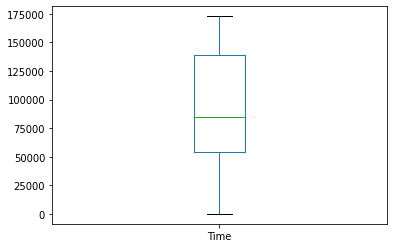

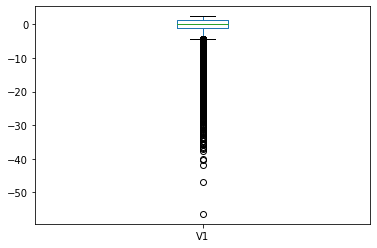

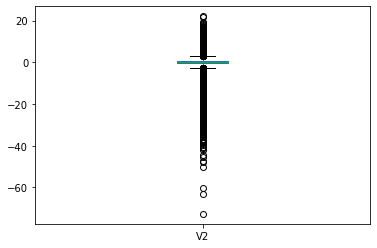

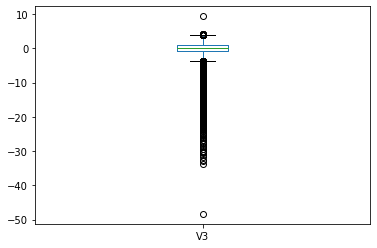

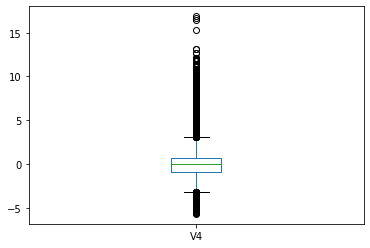

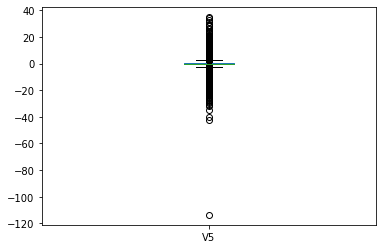

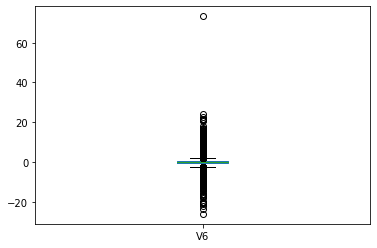

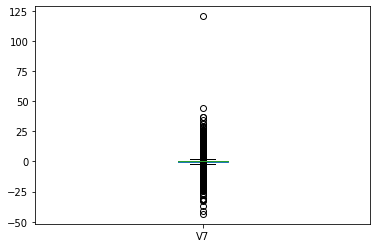

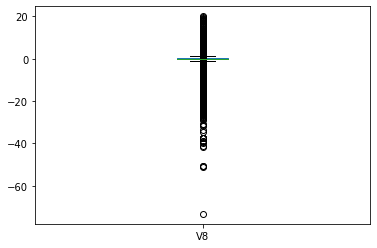

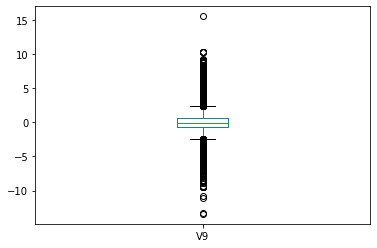

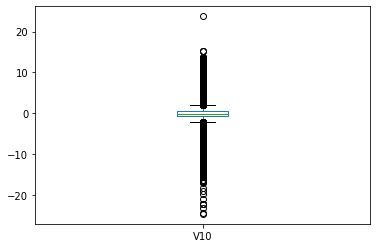

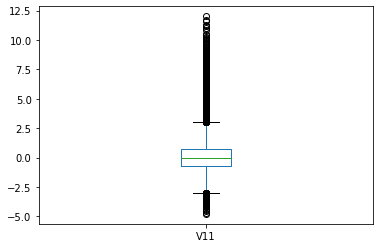

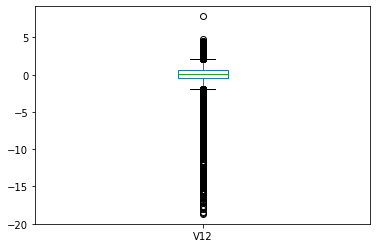

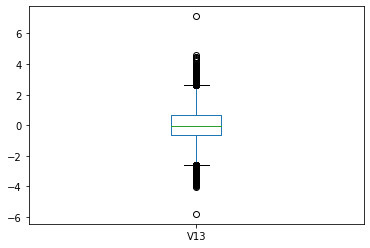

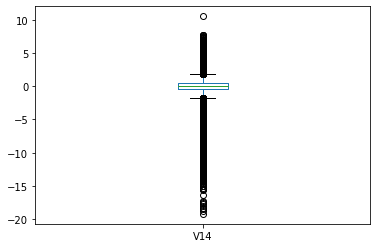

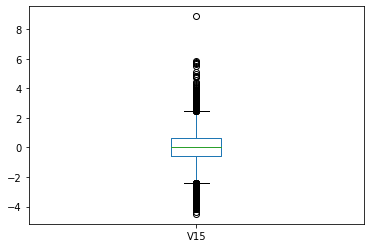

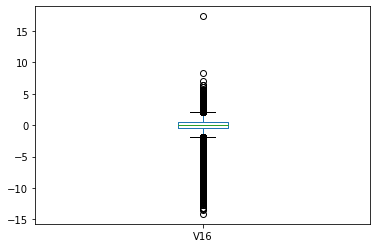

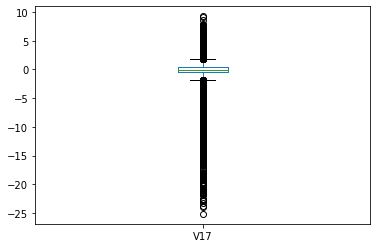

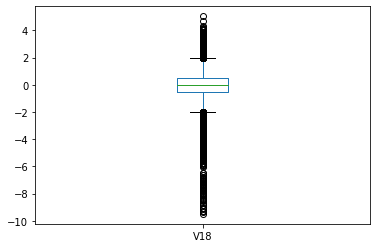

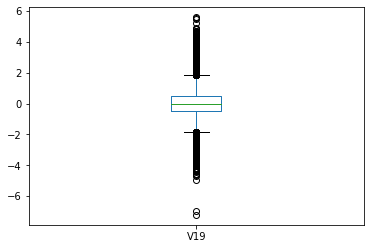

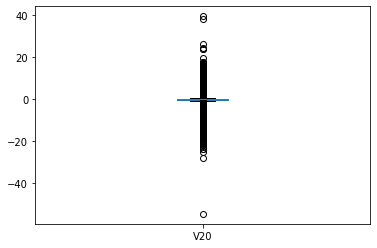

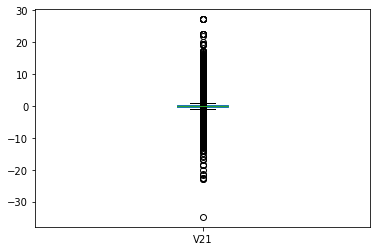

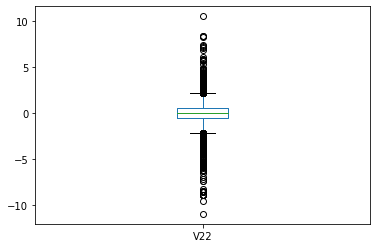

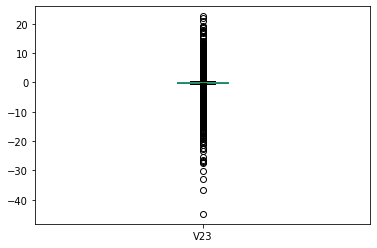

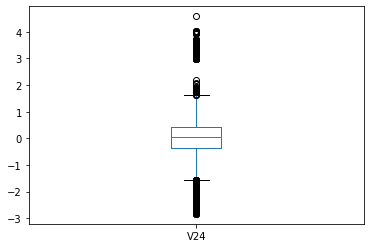

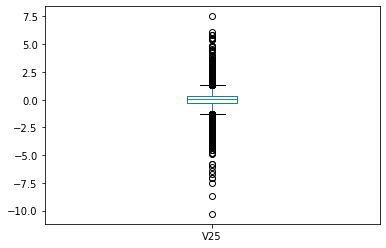

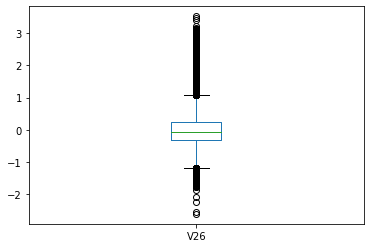

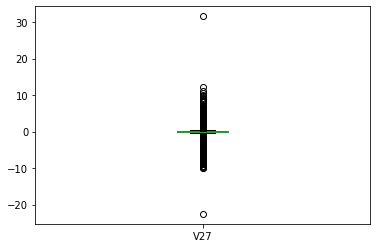

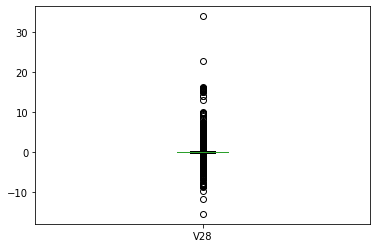

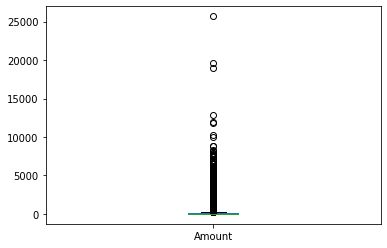

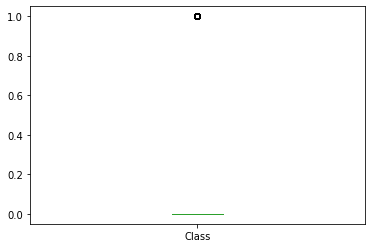

In [20]:
for cols in data.columns.values:
  plot_boxplot(data,cols)

In [21]:
'''
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
'''

'\nQ1 = data.quantile(0.25)\nQ3 = data.quantile(0.75)\nIQR = Q3 - Q1\nprint(IQR)\n'

In [22]:
Q1 = data.V1.quantile(0.25)
Q3 = data.V1.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.V1 >= Q1 - 1.5*IQR) & (data.V1 <= Q3 + 1.5*IQR)]

Q1 = data.V2.quantile(0.25)
Q3 = data.V2.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.V2 >= Q1 - 1.5*IQR) & (data.V2 <= Q3 + 1.5*IQR)]

Q1 = data.V3.quantile(0.25)
Q3 = data.V3.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.V3 >= Q1 - 1.5*IQR) & (data.V3 <= Q3 + 1.5*IQR)]

Q1 = data.V4.quantile(0.25)
Q3 = data.V4.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.V4 >= Q1 - 1.5*IQR) & (data.V4 <= Q3 + 1.5*IQR)]

Q1 = data.V5.quantile(0.25)
Q3 = data.V5.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.V5 >= Q1 - 1.5*IQR) & (data.V5 <= Q3 + 1.5*IQR)]

Q1 = data.V6.quantile(0.25)
Q3 = data.V6.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.V6 >= Q1 - 1.5*IQR) & (data.V6 <= Q3 + 1.5*IQR)]

Q1 = data.V7.quantile(0.25)
Q3 = data.V7.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.V7 >= Q1 - 1.5*IQR) & (data.V7 <= Q3 + 1.5*IQR)]


Q1 = data.V8.quantile(0.25)
Q3 = data.V8.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.V8 >= Q1 - 1.5*IQR) & (data.V8 <= Q3 + 1.5*IQR)]


Q1 = data.V9.quantile(0.25)
Q3 = data.V9.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.V9 >= Q1 - 1.5*IQR) & (data.V9 <= Q3 + 1.5*IQR)]

Q1 = data.V10.quantile(0.25)
Q3 = data.V10.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.V10 >= Q1 - 1.5*IQR) & (data.V10 <= Q3 + 1.5*IQR)]


Q1 = data.V11.quantile(0.25)
Q3 = data.V11.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.V11 >= Q1 - 1.5*IQR) & (data.V11 <= Q3 + 1.5*IQR)]

Q1 = data.V12.quantile(0.25)
Q3 = data.V12.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.V12 >= Q1 - 1.5*IQR) & (data.V12 <= Q3 + 1.5*IQR)]

Q1 = data.V13.quantile(0.25)
Q3 = data.V13.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.V13 >= Q1 - 1.5*IQR) & (data.V13 <= Q3 + 1.5*IQR)]

Q1 = data.V14.quantile(0.25)
Q3 = data.V14.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.V14 >= Q1 - 1.5*IQR) & (data.V14 <= Q3 + 1.5*IQR)]

Q1 = data.V15.quantile(0.25)
Q3 = data.V15.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.V15 >= Q1 - 1.5*IQR) & (data.V15 <= Q3 + 1.5*IQR)]

Q1 = data.V16.quantile(0.25)
Q3 = data.V16.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.V16 >= Q1 - 1.5*IQR) & (data.V16 <= Q3 + 1.5*IQR)]

Q1 = data.V17.quantile(0.25)
Q3 = data.V17.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.V17 >= Q1 - 1.5*IQR) & (data.V17 <= Q3 + 1.5*IQR)]

Q1 = data.V18.quantile(0.25)
Q3 = data.V18.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.V18 >= Q1 - 1.5*IQR) & (data.V18 <= Q3 + 1.5*IQR)]

Q1 = data.V19.quantile(0.25)
Q3 = data.V19.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.V19 >= Q1 - 1.5*IQR) & (data.V19 <= Q3 + 1.5*IQR)]

Q1 = data.V20.quantile(0.25)
Q3 = data.V20.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.V20 >= Q1 - 1.5*IQR) & (data.V20 <= Q3 + 1.5*IQR)]

Q1 = data.V21.quantile(0.25)
Q3 = data.V21.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.V21 >= Q1 - 1.5*IQR) & (data.V21 <= Q3 + 1.5*IQR)]

Q1 = data.V22.quantile(0.25)
Q3 = data.V22.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.V22 >= Q1 - 1.5*IQR) & (data.V22 <= Q3 + 1.5*IQR)]

Q1 = data.V23.quantile(0.25)
Q3 = data.V23.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.V23 >= Q1 - 1.5*IQR) & (data.V23 <= Q3 + 1.5*IQR)]

Q1 = data.V24.quantile(0.25)
Q3 = data.V24.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.V24 >= Q1 - 1.5*IQR) & (data.V24 <= Q3 + 1.5*IQR)]

Q1 = data.V25.quantile(0.25)
Q3 = data.V25.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.V25 >= Q1 - 1.5*IQR) & (data.V25 <= Q3 + 1.5*IQR)]


Q1 = data.V26.quantile(0.25)
Q3 = data.V26.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.V26 >= Q1 - 1.5*IQR) & (data.V26 <= Q3 + 1.5*IQR)]

Q1 = data.V27.quantile(0.25)
Q3 = data.V27.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.V27 >= Q1 - 1.5*IQR) & (data.V27 <= Q3 + 1.5*IQR)]

Q1 = data.V28.quantile(0.25)
Q3 = data.V28.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.V28 >= Q1 - 1.5*IQR) & (data.V28 <= Q3 + 1.5*IQR)]

Q1 = data.Amount.quantile(0.25)
Q3 = data.Amount.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.Amount >= Q1 - 1.5*IQR) & (data.Amount <= Q3 + 1.5*IQR)]
'''
Q1 = data.Class.quantile(0.25)
Q3 = data.Class.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.Class >= Q1 - 1.5*IQR) & (data.Class <= Q3 + 1.5*IQR)]
'''

'\nQ1 = data.Class.quantile(0.25)\nQ3 = data.Class.quantile(0.75)\nIQR = Q3 - Q1\ndata = data[(data.Class >= Q1 - 1.5*IQR) & (data.Class <= Q3 + 1.5*IQR)]\n'

In [23]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0
12,10.0,1.249999,-1.221637,0.383930,-1.234899,-1.485419,-0.753230,-0.689405,-0.227487,-2.094011,...,-0.231809,-0.483285,0.084668,0.392831,0.161135,-0.354990,0.026416,0.042422,121.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284794,172777.0,-1.266580,-0.400461,0.956221,-0.723919,1.531993,-1.788600,0.314741,0.004704,0.013857,...,-0.157831,-0.883365,0.088485,-0.076790,-0.095833,0.132720,-0.028468,0.126494,0.89,0
284796,172780.0,1.884849,-0.143540,-0.999943,1.506772,-0.035300,-0.613638,0.190241,-0.249058,0.666458,...,0.144008,0.634646,-0.042114,-0.053206,0.316403,-0.461441,0.018265,-0.041068,60.00,0
284797,172782.0,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,...,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,5.49,0
284800,172784.0,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,...,-0.268048,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,2.68,0


In [24]:
data.shape

(110122, 31)

In [25]:
data['Class'].unique()

array([0, 1])

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'Class') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]  
vif_data

,feature,VIF
0,Time,16.392349
1,V1,622.909996
2,V2,753.137350
3,V3,2357.967737
4,V4,610.227754
5,V5,323.761807
6,V6,153.465173
7,V7,3229.122693
8,V8,504.442498
9,V9,729.919444


In [27]:
data=data.drop(['V17',], axis = 1)

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'Class') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]  
vif_data

,feature,VIF
0,Time,16.392334
1,V1,95.436124
2,V2,333.516719
3,V3,35.486954
4,V4,6.004397
5,V5,23.068039
6,V6,55.582095
7,V7,1194.044997
8,V8,499.906419
9,V9,151.927154


In [29]:
data=data.drop(['V14',], axis = 1)

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'Class') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]  
vif_data

,feature,VIF
0,Time,15.210869
1,V1,32.852985
2,V2,35.411789
3,V3,8.174638
4,V4,5.937527
5,V5,14.734757
6,V6,6.827577
7,V7,56.161661
8,V8,19.466486
9,V9,7.020486


In [31]:
data=data.drop(['V7',], axis = 1)

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'Class') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]  
vif_data

,feature,VIF
0,Time,13.810038
1,V1,32.367988
2,V2,8.690679
3,V3,8.161412
4,V4,4.998211
5,V5,8.947810
6,V6,6.823585
7,V8,6.937552
8,V9,6.428171
9,V10,7.138981


In [33]:
data=data.drop(['Time',], axis = 1)

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'Class') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]  
vif_data

,feature,VIF
0,V1,22.329934
1,V2,7.786026
2,V3,5.776938
3,V4,4.031569
4,V5,5.440367
5,V6,5.488091
6,V8,5.691568
7,V9,6.363308
8,V10,6.907955
9,V11,2.478794


In [35]:
data=data.drop(['V22',], axis = 1)

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'Class') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]  
vif_data

,feature,VIF
0,V1,18.969007
1,V2,7.515847
2,V3,5.060118
3,V4,3.802321
4,V5,5.363897
5,V6,5.351395
6,V8,5.372447
7,V9,5.884286
8,V10,6.455723
9,V11,2.478026


In [37]:
data

,V1,V2,V3,V4,V5,V6,V8,V9,V10,V11,...,V20,V21,V23,V24,V25,V26,V27,V28,Amount,Class
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,0.085102,-0.255425,-0.166974,1.612727,...,-0.069083,-0.225775,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
5,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.260314,-0.568671,-0.371407,1.341262,...,0.084968,-0.208254,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,0.081213,0.464960,-0.099254,-1.416907,...,-0.219633,-0.167716,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.069539,-0.736727,-0.366846,1.017614,...,0.203711,-0.246914,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0
12,1.249999,-1.221637,0.383930,-1.234899,-1.485419,-0.753230,-0.227487,-2.094011,1.323729,0.227666,...,-0.102756,-0.231809,0.084668,0.392831,0.161135,-0.354990,0.026416,0.042422,121.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284794,-1.266580,-0.400461,0.956221,-0.723919,1.531993,-1.788600,0.004704,0.013857,-0.815911,-1.311976,...,-0.029539,-0.157831,0.088485,-0.076790,-0.095833,0.132720,-0.028468,0.126494,0.89,0
284796,1.884849,-0.143540,-0.999943,1.506772,-0.035300,-0.613638,-0.249058,0.666458,0.120908,-1.134176,...,-0.153997,0.144008,-0.042114,-0.053206,0.316403,-0.461441,0.018265,-0.041068,60.00,0
284797,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,-0.206210,0.106234,-0.284708,-0.612982,...,-0.139512,-0.228876,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,5.49,0
284800,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,-0.118228,0.435402,0.267772,0.523316,...,-0.256922,-0.268048,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,2.68,0


In [38]:
Ind_Features = list(vif_data.feature)
Ind_Features
df_Ind = data[Ind_Features]
df_Ind

,V1,V2,V3,V4,V5,V6,V8,V9,V10,V11,...,V19,V20,V21,V23,V24,V25,V26,V27,V28,Amount
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,0.085102,-0.255425,-0.166974,1.612727,...,-0.145783,-0.069083,-0.225775,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
5,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.260314,-0.568671,-0.371407,1.341262,...,-0.033194,0.084968,-0.208254,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67
6,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,0.081213,0.464960,-0.099254,-1.416907,...,-0.045575,-0.219633,-0.167716,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99
9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.069539,-0.736727,-0.366846,1.017614,...,0.451773,0.203711,-0.246914,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68
12,1.249999,-1.221637,0.383930,-1.234899,-1.485419,-0.753230,-0.227487,-2.094011,1.323729,0.227666,...,-0.683193,-0.102756,-0.231809,0.084668,0.392831,0.161135,-0.354990,0.026416,0.042422,121.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284794,-1.266580,-0.400461,0.956221,-0.723919,1.531993,-1.788600,0.004704,0.013857,-0.815911,-1.311976,...,-0.518738,-0.029539,-0.157831,0.088485,-0.076790,-0.095833,0.132720,-0.028468,0.126494,0.89
284796,1.884849,-0.143540,-0.999943,1.506772,-0.035300,-0.613638,-0.249058,0.666458,0.120908,-1.134176,...,-0.283278,-0.153997,0.144008,-0.042114,-0.053206,0.316403,-0.461441,0.018265,-0.041068,60.00
284797,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,-0.206210,0.106234,-0.284708,-0.612982,...,-0.290491,-0.139512,-0.228876,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,5.49
284800,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,-0.118228,0.435402,0.267772,0.523316,...,0.561695,-0.256922,-0.268048,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,2.68


In [39]:

print(data.Class.value_counts())



0    110109
1        13
Name: Class, dtype: int64


In [40]:
df_dep = data['Class']
df_dep

1         0
5         0
6         0
9         0
12        0
         ..
284794    0
284796    0
284797    0
284800    0
284801    0
Name: Class, Length: 110122, dtype: int64

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_Ind, df_dep, test_size=0.25, random_state=0)

In [42]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()

In [43]:
#####Model Fitting/Training###
logisticRegr.fit(x_train, y_train)

LogisticRegression()

In [44]:
test_pred = logisticRegr.predict(x_test)

In [45]:
test_pred

array([0, 0, 0, ..., 0, 0, 0])

In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [47]:
c1=confusion_matrix(y_test,test_pred)
c1

array([[27530,     0],
       [    1,     0]])

In [48]:
sen=c1[0,0]/(c1[0,0]+c1[0,1])
sen

1.0

In [49]:
spe=c1[1,1]/(c1[1,1]+c1[1,0])
spe

0.0

In [50]:
accuracy_score(y_test,test_pred)

0.9999636773092151

In [58]:
from imblearn.over_sampling import RandomOverSampler
os =  RandomOverSampler(sampling_strategy='minority')

In [59]:
X_train_res, y_train_res = os.fit_resample(df_Ind, df_dep)

In [60]:
X_train_res.shape,y_train_res.shape

((220218, 25), (220218,))

In [63]:
print('Original dataset shape {}'.format(Counter(df_dep)))
print('Resampled dataset shape {}'.format(Counter(y_train_res)))

Original dataset shape Counter({0: 110109, 1: 13})
Resampled dataset shape Counter({0: 110109, 1: 110109})


In [64]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_train_res, y_train_res, test_size=0.25, random_state=0)

In [65]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()

In [66]:
#####Model Fitting/Training###
logisticRegr.fit(x_train, y_train)

LogisticRegression()

In [67]:
test_pred = logisticRegr.predict(x_test)

In [68]:
c1=confusion_matrix(y_test,test_pred)
c1

array([[22637,  4844],
       [    0, 27574]])

In [69]:
accuracy_score(y_test,test_pred)

0.9120152574698029

In [70]:
from sklearn.metrics import classification_report

In [72]:
print(classification_report(y_test, test_pred, ))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90     27481
           1       0.85      1.00      0.92     27574

    accuracy                           0.91     55055
   macro avg       0.93      0.91      0.91     55055
weighted avg       0.93      0.91      0.91     55055



In [74]:
from sklearn.ensemble import RandomForestClassifier

In [75]:
classifier1 = RandomForestClassifier(n_estimators=500)
classifier1.fit(x_train, y_train)
y_pred1 = classifier1.predict(x_test)

In [77]:
c1=confusion_matrix(y_test, y_pred1)
print(c1)

[[27481     0]
 [    0 27574]]


In [78]:
a1=accuracy_score(y_test, y_pred1)
print(a1)

1.0


In [79]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27481
           1       1.00      1.00      1.00     27574

    accuracy                           1.00     55055
   macro avg       1.00      1.00      1.00     55055
weighted avg       1.00      1.00      1.00     55055

